In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation, Reshape
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 3')

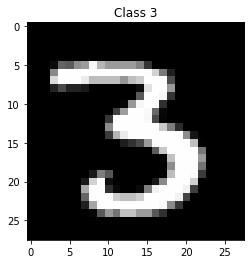

In [3]:
plt.imshow(X_train[12], cmap='gray')
plt.title('Class '+ str(y_train[12]))

In [0]:
y_train_onehot = to_categorical(y_train, num_classes=None, dtype='float32')
EPOCHS = 50
BATCH_SIZE = 128

In [5]:
optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'

def vgg16():
    model = Sequential()
    model.add(Reshape((28, 28, 1)))
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=((28, 28, 1)), activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_last", pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_last", pool_size=(2, 2)))
    
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_last", pool_size=(2, 2)))
    
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_last", pool_size=(2, 2)))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    #model.add(MaxPooling2D(data_format="channels_last", pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model


model = vgg16()

In [0]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

early_stopping = EarlyStopping(monitor='val_loss', patience=100, verbose=1, mode='auto')

def run_vgg16():
    
    history = LossHistory()
    model.fit(X_train, y_train_onehot, batch_size=BATCH_SIZE , epochs=EPOCHS,
              validation_split=0.25, verbose=1, shuffle=True, callbacks=[history, early_stopping])
    

    predictions = model.predict(X_test, verbose=0)
    return predictions, history

def test_accuracy():
    err = []
    t = 0
    for i in range(predictions.shape[0]):
        if (np.argmax(predictions[i]) == y_test[i]):
            t = t+1
        else:
            err.append(i)
    return t, float(t)*100/predictions.shape[0], err

In [7]:
%%time
predictions, history = run_vgg16()
p = test_accuracy()
print("Test accuracy: {} %".format(p[1]))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 45000 samples, validate on 15000 samples
Epoch 1/50





45000/45000 [==============================] - 29s 650us/step - loss: 0.1265 - acc: 0.9575 - val_loss: 0.0423 - val_acc: 0.9873
Epoch 2/50
45000/45000 [==============================] - 14s 307us/step - loss: 0.0231 - acc: 0.9939 - val_loss: 0.0169 - val_acc: 0.9955
Epoch 3/50
45000/45000 [==============================] - 14s 307us/step - loss: 0.0134 - acc: 0.9965 - val_loss: 0.0320 - val_acc: 0.9906
Epoch 4/50
45000/45000 [==============================] - 14s 308us/step - loss: 0.0097 - acc: 0.9977 - val_loss: 0.0097 - val_acc: 0.9973
Epoch 5/50
45000/45000 [==============================] - 14s 309us/step - loss: 0.0074 - acc: 0.9982 - val_loss: 0.0199 - val_acc: 0.9958
Epoch 6/50
45000/45000 [=========